In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Download/Capstone Project two/kc_house_data.csv")

In [3]:
# show the first 5 rows of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Show the total number of columns and rows of the dataframe
df.shape

(21613, 21)

In [5]:
# Show the data types for each columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Select the features
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above","sqft_basement", "yr_built", "yr_renovated", "zipcode","sqft_living15", "sqft_lot15","price"]

In [7]:
# Creating another dataframe with selected columns
rdata = df.loc[:, features]

In [8]:
# Showing the shapes of the dataframe
rdata.shape

(21613, 17)

In [9]:
# Showing the column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

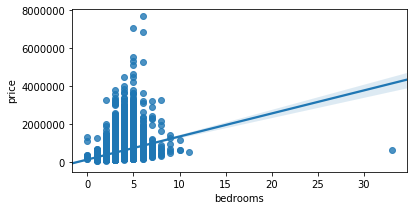

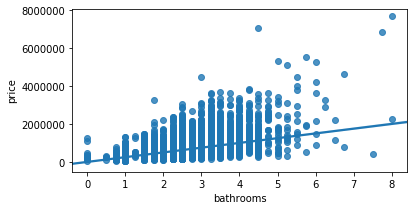

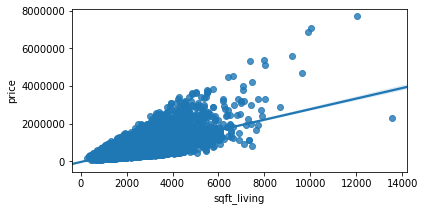

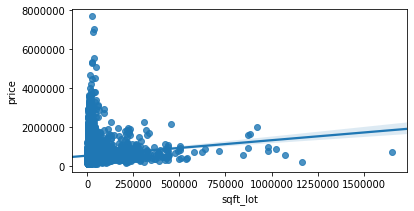

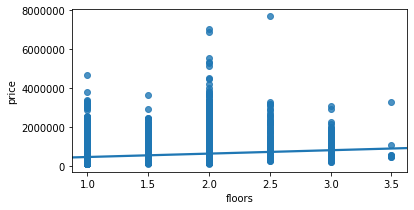

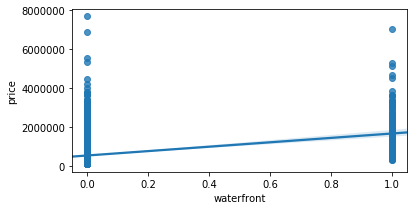

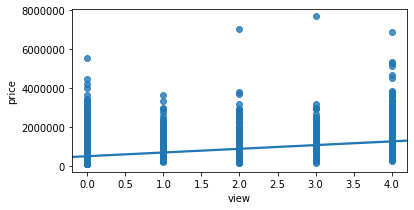

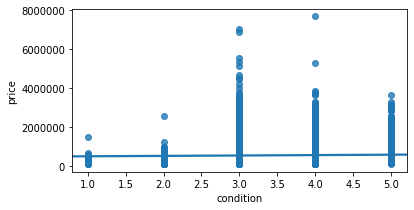

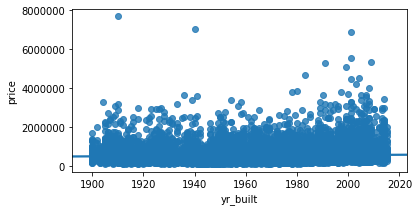

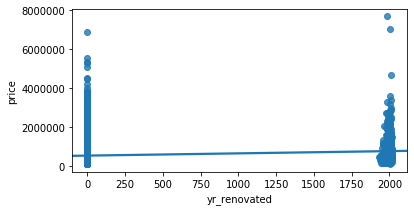

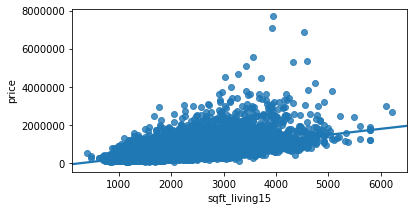

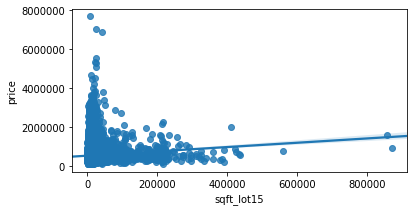

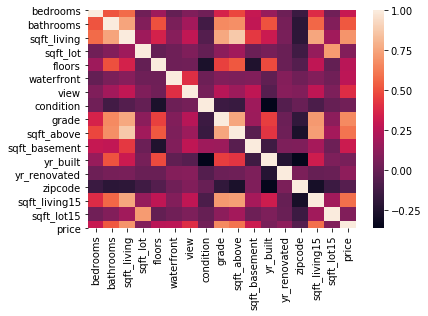

In [10]:
# Identifying the correlation between each features with house sale price
Variables = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"]
for x in Variables:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.regplot(x=rdata[x], y=rdata['price'])
    plt.show()
sns.heatmap(rdata.corr())

In [11]:
# number of bedrooms, bathrooms,sqft living show the highest correlation with house sale price

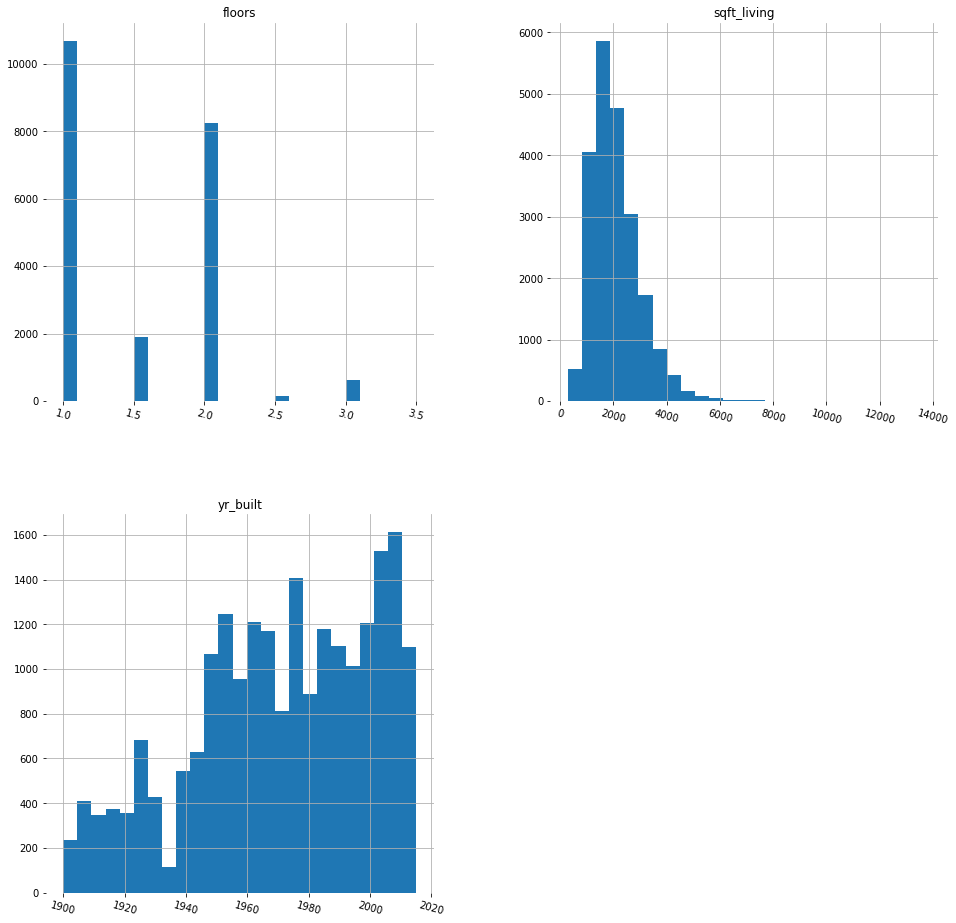

In [12]:
# Plot out the data using histograms
df1=df[['sqft_living', 'floors', 'yr_built', ]]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

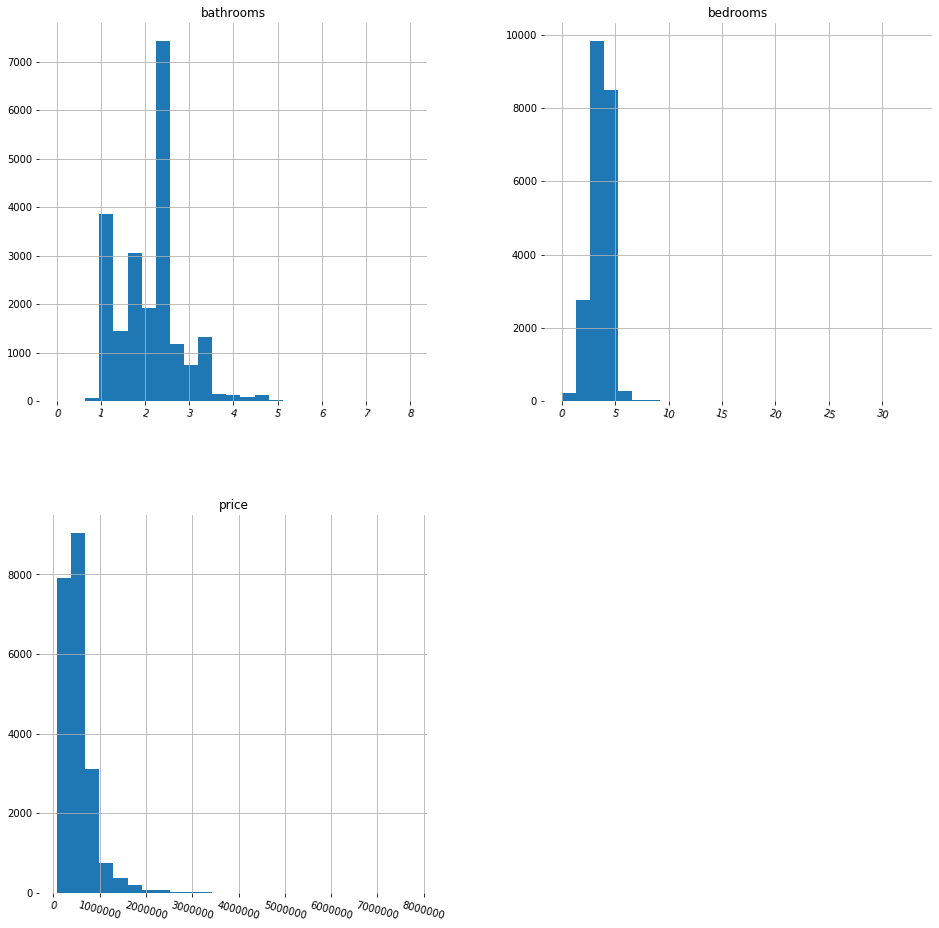

In [13]:
# Plot out the data using histograms
df1=df[['price', 'bedrooms', 'bathrooms']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [14]:
# Creating linear regression model: 

In [15]:
# Splitting the dataset into two datasets, one for training which account for 80% and the rest for testing 
# the linear regression model accuracy
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

In [16]:
# Creating the linear regression model lr
lr = linear_model.LinearRegression()

In [17]:
# Load sqft_living data into X_train variable
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)

In [18]:
# Load price data into y_train variable
y_train = np.array(train_data['price'], dtype=pd.Series)

In [19]:
# Using the training data to train the linear regression model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Load the test data sqft_living into X_test
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)

In [21]:
# Load the test data price into X_test
y_test = np.array(test_data['price'], dtype=pd.Series)

In [22]:
# Using the trained linear regression model to predict the house price with input X_test, sqft_living
pred = lr.predict(X_test)

In [23]:
# showing the intercept of the linear regression model
lr.intercept_

-47235.811302901246

In [24]:
# showing the coef of the linear regression model
lr.coef_

array([282.2468152])

In [25]:
# Calculating the mean squared error of this linear regression model
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rmsesm

254289.149

In [26]:
# Showing the R2 score
lr.score(X_test,y_test)

0.4962393622495711

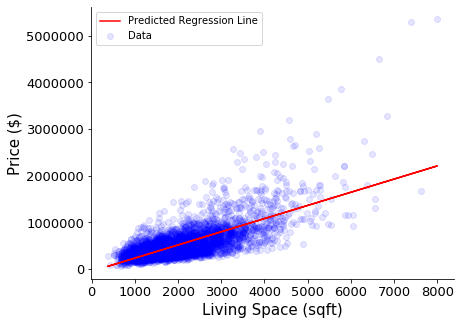

In [27]:
# Plotting out the predicted regression line and the actual house price
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='blue',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [28]:
# Creating multi-regression model using selected features: 

In [29]:
# Selecting features for the multi-regression model
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [30]:
# Creating the multi-linear regression model
mlr = linear_model.LinearRegression()

In [31]:
# Show the total number of columns and rows
train_data[features].shape

(17290, 6)

In [32]:
# Show the total number of columns and rows
train_data['price'].shape

(17290,)

In [33]:
# Train the multi-linear regression model
mlr.fit(train_data[features],train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Showing its intercept
mlr.intercept_

-57221293.13485957

In [35]:
# Showing its coeff of the multi-linear regression model
mlr.coef_

array([-5.68950279e+04,  1.13310062e+04,  3.18389287e+02, -2.90807628e-01,
       -5.79609821e+03,  5.84022824e+02])

In [36]:
# Using the trained multi-linear regression model to do prediction 
pred_mlr = mlr.predict(test_data[features])

In [37]:
# Calculating the mean squared error of the multi-linear regression model
rmsecm_mlr = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred_mlr)),'.3f'))
rmsecm_mlr

248514.011

In [38]:
# Showing the R2 score
mlr.score(test_data[features],test_data['price'])

0.5188612547922393

In [39]:
# Creating multi-regression model using all features:

In [40]:
# Selecting the features
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [41]:
# Creating the multi-regression model
mlr_all = linear_model.LinearRegression()

In [42]:
# Training the model
mlr_all.fit(train_data[features],train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Using the trained model to do prediction
pred_mlr_all = mlr_all.predict(test_data[features])

In [44]:
# Calculating the mean squared error of the multi-linear regression model
rmsecm_mlr_all = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred_mlr_all)),'.3f'))
rmsecm_mlr_all

193693.989

In [45]:
# Showing the R2 score
mlr_all.score(test_data[features],test_data['price'])

0.7077188146880506

In [58]:
# Performing Data binning

df_dm=df.copy()
df_dm.describe()

# just take the year from the date column
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

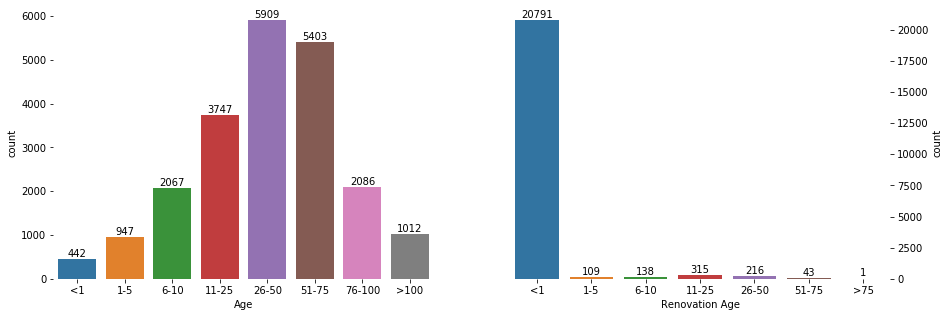

In [60]:
# just take the year from the date column
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0


# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

In [47]:
# Creating multi-regression model using all features, including preprocessing columns : 

In [48]:
# Seperating the datasets into training dataset and testing dataset
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

In [49]:
# Selecting features for the multi-regression model, including preprocessing columns 
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [50]:
# Creating the multi-linear regression model using all features
mlr_allp = linear_model.LinearRegression()

In [51]:
# Training the model
mlr_allp.fit(train_data_dm[features],train_data_dm['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Using the model to do prediction
pred_mlr_allp = mlr_allp.predict(test_data_dm[features])

In [53]:
# Showing the result of the prediction
pred_mlr_allp

array([ 520930.61407483, 1253677.16497942,  788167.20585354, ...,
       1068375.12080399, 1264257.42669315,  177848.78852638])

In [54]:
# Calculating the mean squared error of the multi-linear regression model
rmsecm_mlr = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred_mlr_allp)),'.3f'))
rmsecm_mlr

191879.55

In [55]:
# Showing the R2 score
mlr_allp.score(test_data_dm[features],test_data_dm['price'])

0.7131690871261687

In [56]:
# Linear regression model R2 score: 0.4962393622495711
# Multi-regression model with selected features: 0.5188612547922393
# Multi-regression model using all features: 0.7077188146880506
# Multi-regression model using all features, including preprocessing columns : 0.7131690871261687